# 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [41]:
vehicle_df=pd.read_csv('vehicle.csv')
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [42]:
# Data preprocessing

#show details
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [43]:
vehicle_df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [44]:
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [45]:
vehicle_df.shape

(846, 19)

In [46]:
#Checking for missing values
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [47]:
#Replacing the missing values by median 
for i in vehicle_df.columns[:17]:
    median_value = vehicle_df[i].median()
    vehicle_df[i] = vehicle_df[i].fillna(median_value)
vehicle_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

# 2. Understanding the attributes

In [48]:
#correlation matrix
vehicle_df.corr()
# circularity and scaled_radius_of_gyration have high correlation. We can remove scaled_radius_of_gyration.

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                              0.015599       0.074458   
skewness_about.1                            0.043422       0.212428   
skewness_about.2                           -0.

In [49]:
#removing column scaled_radius_of_gyration
vehicle_df.drop(['scaled_radius_of_gyration'], axis = 1)

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration.1  \
0              176.0              379.0                         70.0   
1              170.0              330.0                         72.0   
2              223.0              635.0                         73.0   
3              160.0              309.0                         63.0   
4              241.0              325.0                        127.0   
..               ...                ...                          ...   
841            200.0              422.0                         72.0   
842            173.0              368.0                         72.0   
843            228.0              721.0                         70.0   
844            155.0              270.0                         66.0   
845            140.0              212.0                         73.0   

     skewness_about  skewness_about.1  skewness_about.2  hollows_ratio class  
0               6.0              16.0             187.0            197   van  
1               9.0              14.0             189.0            199   van  
2              14.0               9.0             188.0            196   car  
3               6.0              10.0             199.0            207   van  
4               9.0              11.0             180.0            183   bus  
..              ...               ...               ...            ...   ...  
841             7.0              25.0             18

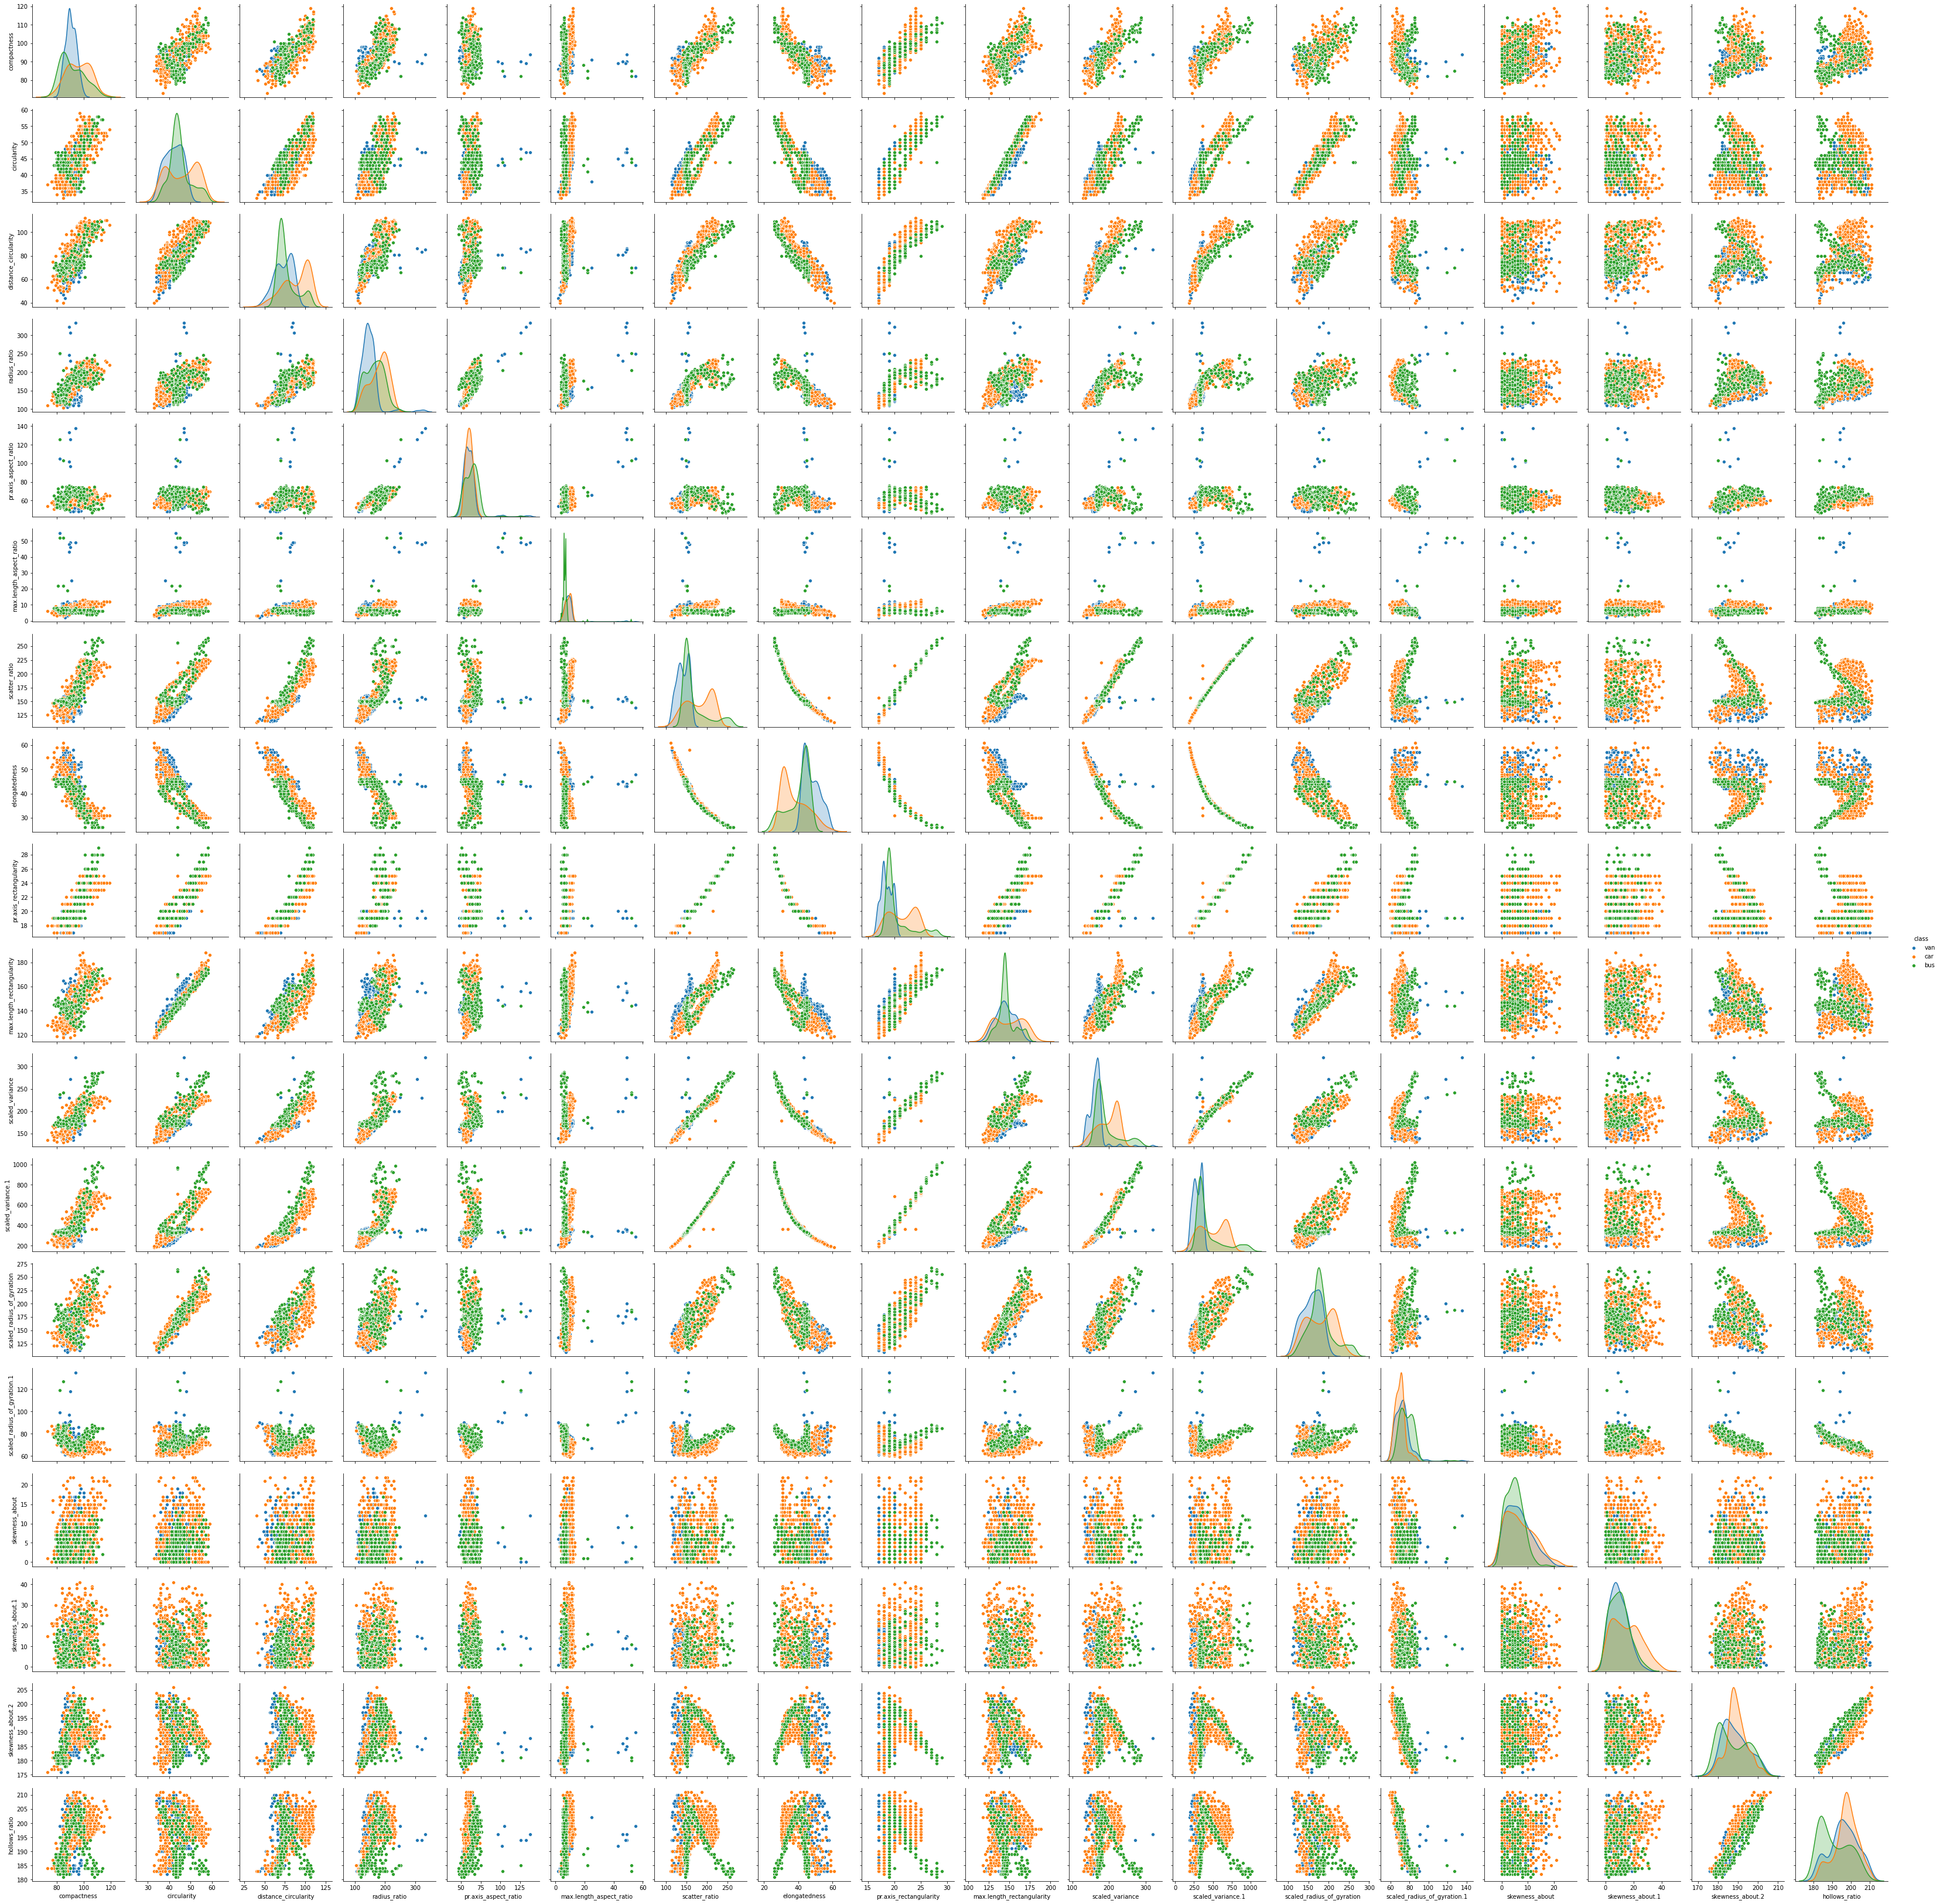

In [16]:
sns.pairplot(vehicle_df,hue='class')

# 3. Split the data into train and test

In [50]:
X = vehicle_df.iloc[:,0:18]
y = vehicle_df.iloc[:,18]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

# 4. Train a Support vector machine using the train set and get the accuracy on the test set

In [51]:
model = SVC()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [21]:
# Accuracy of model
# Accuracy on the training data
print('Accuracy on Training data: ',model.score(X_train, y_train))
# Accuracy on the testing data
print('Accuracy on Testing data: ', model.score(X_test , y_test))
# Confusion matrix
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy on Training data:  0.6858108108108109
Accuracy on Testing data:  0.6496062992125984
Confusion Matrix:
 [[33  4 19]
 [31 96  3]
 [ 7 25 36]]


# 5. Perform K-fold cross validation and get the cross validation score of the model 

In [52]:
scores = cross_val_score(model, X, y, cv=5)
print(scores)
print('Average score: ', np.mean(scores))

[0.64117647 0.67455621 0.70414201 0.68047337 0.70414201]
Average score:  0.6808980160111382


# 6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

In [53]:
# Scaling the independent attributes using zscore
X_z=X.apply(zscore)

In [54]:
# Calculating covariance
cov_matrix = np.cov(X_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.1038547

In [55]:
# Finding eigenvalues amd eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01  1.19922479e-01 -7.83843562e-02
  -6.95178336e-02  1.44875476e-01  4.51862331e-01  5.66136785e-01
   4.84418105e-01  2.60076393e-01 -4.65342885e-02  1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01  2.48205467e-02 -1.87337408e-01
   8.50649539e-02 -3.02731148e-01 -2.49103387e-01  1.79851809e-01
   1.41569001e-02 -9.80779086e-02 -3.01323693e-03 -2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02  5.60143254e-02  7.12008427e-02
  -4.06645651e-02 -1.38405773e-01  7.40350569e-02 -4.34748988e-01
   1.67572478e-01  2.05031597e-01 -7.06489498e-01  3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01 -2.75074211e-01  4.26053415e-02
   4.61473714e-02  

In [56]:
# Make a set of (eigenvalue, eigenvector) pairs
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:]

[(9.404602609088705,
  array([ 0.27528369,  0.29325847,  0.30460913,  0.26760688,  0.08050399,
          0.09727569,  0.31709275, -0.31413315,  0.31395906,  0.2828309 ,
          0.30928036,  0.31378846,  0.27204749, -0.02081377,  0.04145551,
          0.05822502,  0.03027951,  0.07414539])),
 (3.014922058524633,
  array([ 0.12695376, -0.12557673,  0.07295164,  0.18963438,  0.12217486,
         -0.01074829, -0.04811814, -0.01274985, -0.05993525, -0.11622053,
         -0.06228062, -0.05378436, -0.20923317, -0.48852515,  0.05508997,
          0.12408509,  0.54091477,  0.54035426])),
 (1.9035250218389657,
  array([ 0.11992248,  0.02482055,  0.05601433, -0.27507421, -0.64201297,
         -0.5918013 ,  0.09762831, -0.05764844,  0.10951242,  0.0170642 ,
         -0.05632398,  0.10884073,  0.03146365, -0.28627701,  0.11567935,
          0.07528289, -0.00873592, -0.03952427])),
 (1.1799374684450215,
  array([-0.07838436, -0.18733741,  0.07120084,  0.04260534, -0.03272571,
         -0.03141473,

Cumulative Variance Explained [ 52.18603365  68.9158021   79.47844095  86.02590063  91.11576952
  94.11218252  96.10354875  97.33504945  98.22626473  98.73597943
  99.10498391  99.36357011  99.5621946   99.71430385  99.82849808
  99.92791726  99.98355026 100.        ]


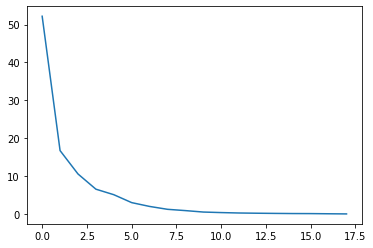

In [57]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
plt.plot(var_exp)

In [58]:
# Reducing to 10 dimension space
pca = PCA(n_components=10)
data_reduced = pca.fit_transform(X_z)
data_reduced.transpose()

array([[ 3.34162030e-01, -1.59171085e+00,  3.76932418e+00, ...,
         4.80917387e+00, -3.29409242e+00, -4.76505347e+00],
       [-2.19026358e-01, -4.20602982e-01,  1.95282752e-01, ...,
        -1.24931049e-03, -1.00827615e+00,  3.34899728e-01],
       [ 1.00158417e+00, -3.69033854e-01,  8.78587404e-02, ...,
         5.32333105e-01, -3.57003198e-01, -5.68136078e-01],
       ...,
       [-3.81106357e-01,  2.47058909e-01,  4.82771767e-01, ...,
         1.10477865e-01,  3.20621635e-01, -2.48034955e-01],
       [-8.66309530e-01,  1.47249715e-01, -3.10832555e-01, ...,
        -6.52536352e-01, -2.01263247e-01, -4.29903644e-01],
       [ 9.15114442e-02, -9.37944293e-02, -4.67615341e-01, ...,
         5.56591558e-01, -8.74536682e-01, -2.99232676e-01]])

In [59]:
pca.components_

array([[ 2.75283688e-01,  2.93258469e-01,  3.04609128e-01,
         2.67606877e-01,  8.05039890e-02,  9.72756855e-02,
         3.17092750e-01, -3.14133155e-01,  3.13959064e-01,
         2.82830900e-01,  3.09280359e-01,  3.13788457e-01,
         2.72047492e-01, -2.08137692e-02,  4.14555082e-02,
         5.82250207e-02,  3.02795063e-02,  7.41453913e-02],
       [-1.26953763e-01,  1.25576727e-01, -7.29516436e-02,
        -1.89634378e-01, -1.22174860e-01,  1.07482875e-02,
         4.81181371e-02,  1.27498515e-02,  5.99352482e-02,
         1.16220532e-01,  6.22806229e-02,  5.37843596e-02,
         2.09233172e-01,  4.88525148e-01, -5.50899716e-02,
        -1.24085090e-01, -5.40914775e-01, -5.40354258e-01],
       [-1.19922479e-01, -2.48205467e-02, -5.60143254e-02,
         2.75074211e-01,  6.42012966e-01,  5.91801304e-01,
        -9.76283108e-02,  5.76484384e-02, -1.09512416e-01,
        -1.70641987e-02,  5.63239801e-02, -1.08840729e-01,
        -3.14636493e-02,  2.86277015e-01, -1.15679354e

In [60]:
X_comp = pd.DataFrame(pca.components_,columns=list(X_z))
X_comp.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.275284     0.293258              0.304609      0.267607   
1    -0.126954     0.125577             -0.072952     -0.189634   
2    -0.119922    -0.024821             -0.056014      0.275074   
3     0.078384     0.187337             -0.071201     -0.042605   
4     0.069518    -0.085065              0.040665     -0.046147   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.080504                 0.097276       0.317093   
1             -0.122175                 0.010748       0.048118   
2              0.642013                 0.591801      -0.097628   
3              0.032726                 0.031415      -0.095749   
4             -0.040549                 0.213433      -0.015485   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -0.314133                0.313959                   0.282831   
1       0.012750                0.059935                   0.116221   
2       0.057648               -0.109512                  -0.017064   
3       0.082290               -0.092458                   0.188006   
4       0.076852                0.002176                  -0.060637   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.309280           0.313788                   0.272047   
1         0.062281           0.053784                   0.209233   
2         0.056324          -0.108841                  -0.031464   
3        -0.119844          -0.091745                   0.200095   
4        -0.000456          -0.019555                  -0.061599   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.020814        0.041456          0.058225   
1                     0.488525       -0.055090         -0.124085   
2                     0.286277       -0.115679         -0.075283   
3                    -0.065505        0.604794         -0.666114   
4                     0.145530        0.729190          0.599196   

   skewness_about.2  hollows_ratio  
0          0.030280       0.074145  
1         -0.540915      -0.540354  
2          0.008736       0.039524  
3          0.105526       0.047489  
4         -0.100602      -0.029861

In [61]:
# P_reduce represents reduced mathematical space.
# Reducing from 17 to 10 dimension space
P_reduce = np.array(eigenvectors[0:10])   
# projecting original data into principal component dimensions
X_std_10D = np.dot(X_z,P_reduce.T)   
Proj_data_df = pd.DataFrame(X_std_10D)

# 7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data

In [62]:
# Split X and y into training and test set in 70:30 ratio
X_train2, X_test2, y_train2, y_test2 = train_test_split(Proj_data_df,y, test_size = 0.3, random_state = 10)

In [63]:
model2 = SVC()
model2.fit(X_train2, y_train2)
prediction = model2.predict(X_test2)

In [64]:
# Accuracy of model
# Accuracy on the training data
print('Accuracy on Training data: ',model2.score(X_train2, y_train2))
# Accuracy on the testing data
print('Accuracy on Testing data: ', model2.score(X_test2 , y_test2))
# Confusion matrix
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test2))

Accuracy on Training data:  0.9222972972972973
Accuracy on Testing data:  0.9251968503937008
Confusion Matrix:
 [[ 67   2   1]
 [  0 115   4]
 [  4   8  53]]


In [67]:
scores = cross_val_score(model2, Proj_data_df, y, cv=5)
print(scores)
print('Average score: ', np.mean(scores))

[0.91176471 0.9112426  0.90532544 0.90532544 0.90532544]
Average score:  0.9077967281587191


# 8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings

In [ ]:
# Accuracy on testing data for model trained using raw data:  0.6496062992125984
# Average cross validation score using raw data:  0.6808980160111382

# Accuracy on testing data for model trained using Principal components: 0.9251968503937008
# Average cross validation score using Principal components: 0.9077967281587191

# PCA improved the performance 